# Simple Linear Regression

## Predicting Student Performance Based on Study Hours

### Objective:

Predicting Sales Based on Advertising Budget

### Context:

In the business domain, understanding the impact of advertising expenditure on sales is critical for optimizing marketing strategies and maximizing return on investment (ROI). By leveraging data on advertising budgets and corresponding sales figures, we can create a model to predict future sales and provide actionable insights for marketing and financial planning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/business_sales_data.csv")
df.head()

,Advertising_Budget,Sales
0,43.708611,152.014337
1,95.564288,300.016141
2,75.879455,249.539354
3,63.879264,214.690719
4,24.041678,94.923985


### Dataset Description:

The dataset consists of two columns:

**Advertising_Budget:**
- Description: The amount of money spent on advertising, measured in thousands of dollars.
- Type: Numeric
- Range: 10 to 100 thousand dollars
- Example Values: 15.25, 45.78, 89.34


 **Sales:**
- Description: The sales revenue generated, measured in thousands of dollars.
- Type: Numeric
- Range: Approximately 20 to 320 thousand dollars
- Example Values: 68.92, 160.25, 290.13


# Problem Statement

Develop a linear regression model to predict sales revenue based on the advertising budget. The model should help businesses identify how much investment in advertising is generally required to achieve a certain level of sales, thereby aiding in the development of effective marketing strategies and budget allocations.

In [ ]:
df.shape

(1000, 2)

In [ ]:
# summary of all numeric columns
df.describe()

,Advertising_Budget,Sales
count,1000.000000,1000.000000
mean,54.123090,182.863748
std,26.292363,78.805949
min,10.416882,44.152942
25%,31.237594,112.613311
50%,54.712664,184.425289
75%,76.988763,249.701736
max,99.974591,326.042984


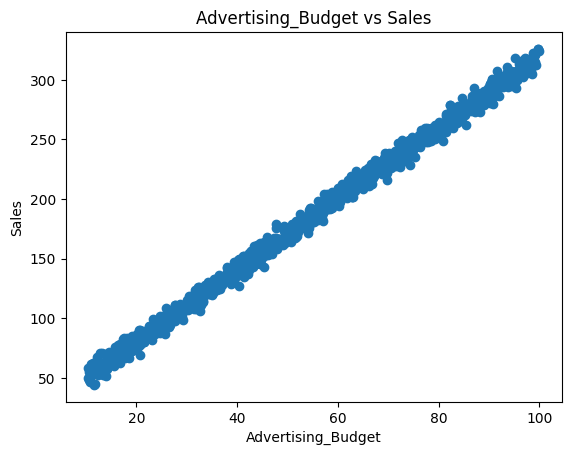

In [ ]:
# Scatter plot of Adv_Budget vs Sales
plt.scatter(df['Advertising_Budget'], df['Sales'])
plt.title('Advertising_Budget vs Sales')
plt.xlabel('Advertising_Budget')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Correlation check
correlation = df.corr()
correlation

,Advertising_Budget,Sales
Advertising_Budget,1.000000,0.998034
Sales,0.998034,1.000000


In [ ]:
df.head()

,Advertising_Budget,Sales
0,43.708611,152.014337
1,95.564288,300.016141
2,75.879455,249.539354
3,63.879264,214.690719
4,24.041678,94.923985


In [ ]:
X = df[['Advertising_Budget']] # Independent Variable
y = df['Sales'] # Dependent Variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 1) (200, 1) (800,) (200,)


In [ ]:
X_train.head()

,Advertising_Budget
687,35.198118
500,72.834554
332,11.295414
979,63.715856
817,45.910243


In [ ]:
# Modeling

from sklearn.linear_model import LinearRegression # import

lr = LinearRegression() # create an object
lr.fit(X_train, y_train) # fit means study

LinearRegression()

In [ ]:
lr

LinearRegression()

In [ ]:
lr.intercept_ # intercept

21.19664305700769

In [ ]:
lr.coef_ # m i.e. Slope

array([2.98922841])

# y = mx + c
# y = 2.98922841x + 21.19664305700769

In [ ]:
X_test

,Advertising_Budget
993,63.120760
859,15.913778
298,66.060143
553,60.484417
672,17.221037
...,...
679,87.895641
722,15.984664
215,31.352418
653,77.089553


In [ ]:
lr.predict(X_test)

array([209.87901211,  68.766559  , 218.6654987 , 201.99838198,
        72.67425642, 303.12475357, 189.43370446, 186.31366419,
       189.98949734, 137.81196156, 208.11025592, 254.24392352,
        99.94426202,  98.73711185, 183.4832475 , 299.10126592,
       271.00622374,  97.99882464, 100.00539932,  71.00920104,
        96.9651271 , 238.26658436, 169.18565289,  72.19609111,
        79.09731693, 175.38260576, 229.32766622, 187.90998338,
        91.8941045 , 306.86012639, 158.2084725 , 255.61345161,
       286.10827083,  92.34514052, 294.66434441, 156.66865292,
        63.72420734, 309.67855975, 256.52221915, 240.07861143,
       264.91745471, 297.87430914, 171.45652533,  92.61721439,
       154.69198351, 144.09171277, 141.26722772, 118.82605839,
       161.1097655 ,  85.7615105 , 254.97268824, 191.5883222 ,
        88.77580777, 217.40847696, 192.1659333 , 183.61824728,
       284.35787583, 268.83180948, 168.07076818, 118.41191338,
       144.78028936, 139.19572217, 184.86396957,  94.57

In [ ]:
y_test

,Sales
993,210.335317
859,62.403668
298,225.684227
553,208.906883
672,72.866877
...,...
679,287.052831
722,63.862998
215,112.651752
653,248.353271


In [ ]:
y_pred = lr.predict(X_test)

list(zip(y_test, y_pred))

[(210.33531733083973, 209.8790121140557),
 (62.40366807438379, 68.76655900290217),
 (225.68422742430164, 218.66549870176073),
 (208.90688299880404, 201.99838197742488),
 (72.86687722608623, 72.67425642083612),
 (306.33340621533915, 303.12475357301935),
 (186.44955526335772, 189.4337044558192),
 (186.70001316186384, 186.3136641897636),
 (194.55251131148196, 189.98949734323318),
 (129.94370947851007, 137.811961558387),
 (219.1837978996439, 208.11025591660623),
 (251.946174939171, 254.24392352481448),
 (102.71560302184707, 99.94426201891211),
 (99.9407131719128, 98.73711185019299),
 (175.47684128760466, 183.48324750058148),
 (300.0771171189241, 299.101265923099),
 (268.3866751828871, 271.0062237393556),
 (102.66541498928834, 97.99882463645085),
 (93.68745844387584, 100.00539932209033),
 (72.34913375013642, 71.00920103524344),
 (93.84285810419784, 96.96512709732524),
 (238.2321729829087, 238.2665843592305),
 (168.16427729345142, 169.18565289325517),
 (70.99711177986259, 72.19609110830734),

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

3.9928393149369117
3.732137205131051


In [ ]:
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

25.232669633173074
21.02761272003974


In [ ]:
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

5.023213078615427
4.585587499987296


In [ ]:
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)
print(r2_score_train)
print(r2_score_test)

0.9959568128835729
0.9964768727219213


In [ ]:
# Adjusted R2 Train
N, p = X_train.shape
# print(N)
# print(p)

num = (1-r2_score_train)*(N-1)
den = N - p - 1
ar2_score_train = 1 - (num/den)
print(ar2_score_train)

0.995951746233051


In [ ]:
# Adjusted R2 Test
N, p = X_test.shape
# print(N)
# print(p)

num = (1-r2_score_test)*(N-1)
den = N - p - 1
ar2_score_test = 1 - (num/den)
print(ar2_score_test)

0.9964590791498098


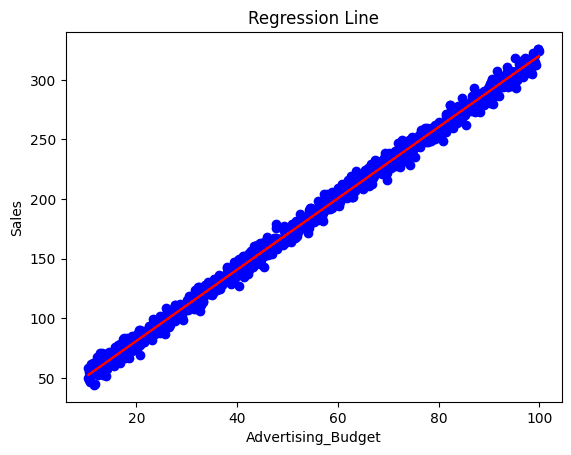

In [ ]:
# Plotting the regression line

plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red')
plt.title('Regression Line')
plt.xlabel('Advertising_Budget')
plt.ylabel('Sales')
plt.show()